# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.066688e+01     9.354189e+00
 * time: 0.003856182098388672
     1     2.723041e+01     4.124599e+00
 * time: 0.018653154373168945
     2     1.782507e+01     3.897515e+00
 * time: 0.03663516044616699
     3     1.165714e+01     1.805417e+00
 * time: 0.0533750057220459
     4     1.006672e+01     9.499515e-01
 * time: 0.06902313232421875
     5     9.388122e+00     1.292217e+00
 * time: 0.08144998550415039
     6     8.968711e+00     7.047504e-01
 * time: 0.09453320503234863
     7     8.676423e+00     6.716013e-01
 * time: 0.10773515701293945
     8     8.483768e+00     5.878152e-01
 * time: 0.12102317810058594
     9     8.304280e+00     6.221605e-01
 * time: 0.19836711883544922
    10     8.156982e+00     5.918894e-01
 * time: 0.21102309226989746
    11     8.018589e+00     4.812865e-01
 * time: 0.22346019744873047
    12     7.903793e+00     2.974638e-01
 * time: 0.23582220077514648
    13     7.862494e+00     6.333084e-01
 * time

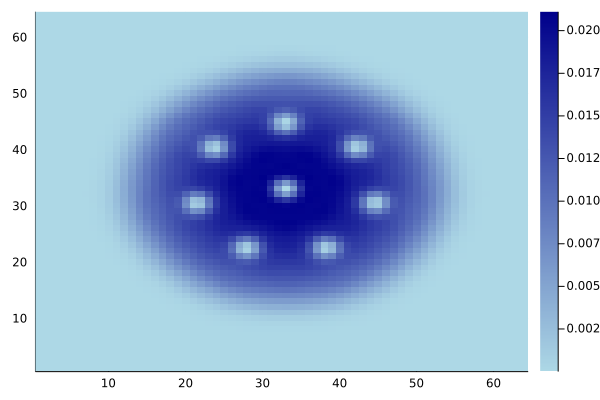

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)